In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Game import *
from RobotSim373 import *

Version:  0.2.35
Version:  0.0.46


In [3]:
from TTT import *

TTT Version: 0.0.3


In [4]:
def train_classifier(t,robot):
    from classy import image,  remap_targets,  NaiveBayes 
    
    images=image.load_images('images/ttt pics/training pieces',verbose=False)
    images=remap_targets(images,new_target_names=['_','X','O'])    
    data=image.images_to_vectors(images)    
    
    C=NaiveBayes()
    C.fit(data.vectors,data.targets)    

    robot.C=C
    
    return True

def board_square_image(im,r,c,randomize=False):
    if isinstance(im,str):
        im=imread(im)
        
    board_im=im[55:375,65:375]    
    
    
    start_row=77
    start_col=79
    sub_image_rows=50
    sub_image_cols=50

    if randomize:
        offset_r=randint(-20,20)
        offset_c=randint(-20,20)
    else:
        offset_r=0
        offset_c=0
        
    
    
    sub_image=board_im[ (start_row+offset_r+sub_image_rows*r):(start_row+offset_r+sub_image_rows*(r+1)) , 
                  (start_col+offset_c+sub_image_cols*c):(start_col+offset_c+sub_image_cols*(c+1))  ,
                  :]  # all the channels
    
    
    return sub_image

def read_state(t,robot):
    
    image_filename=f'images/ttt pics/board.jpeg'
    robot.take_picture(image_filename)
    robot.image_filename=image_filename  # save the last name
    
    state=initial_state()
    
    im=imread(robot.image_filename)    

    for r in range(3):
        for c in range(3):
            sub_image=board_square_image(im,r,c)
            vector=atleast_2d(sub_image.ravel())
            prediction=robot.C.predict(vector)[0]
            
            state[r,c]=prediction
    
    robot.state=state
    
    return True
        



In [9]:
state_machine=StateMachine(
    (train_classifier,"read_state"),
    ([read_state,get_move],"make_move"),
    (make_move,"_end_simulation"),
)

In [10]:
state=initial_state()

print(state)

 .  .  . 
 .  .  . 
 .  .  . 



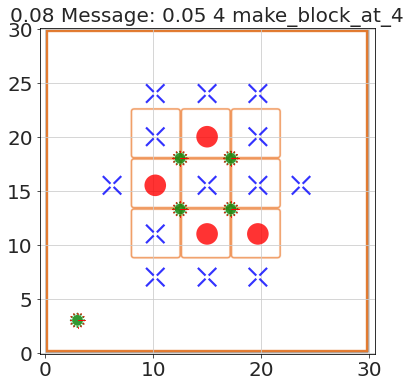

In [19]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)

robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

set_up_board(env,state)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )



In [18]:
state=update_state(robot.state,1,robot.move)
show_state(state)

status=win_status(state,1)
if status=='win':
    print("The robot won")
elif status=='lose':
    print("The robot lost")    
elif status=='stalemate':
    print("stalemate")
else:
    pass
    
# human move

if not status:

    move=human_move(state,2)
    state=update_state(state,2,move)

    status=win_status(state,1)
    if status=='win':
        print("The human won")
    elif status=='lose':
        print("The human lost")    
    elif status=='stalemate':
        print("stalemate")
    else:
        pass

    show_state(state)    

 X  O  X 
 O  .  X 
 X  .  O 

 0  1  2 
 3  4  5 
 6  7  8 

Player 2


which square to move? 7


 X  O  X 
 O  .  X 
 X  O  O 

